In [4]:
from config import weather_api_key, g_key
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from datetime import datetime
import time
from scipy.stats import linregress
import gmaps

In [2]:
lats = np.random.uniform(-90, 90, size=1500)
lngs = np.random.uniform(-180, 180, size=1500)

coordinates = zip(lats, lngs)
cities = []


for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    if city not in cities:
        cities.append(city)

In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="
city = "Boston"
city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count = 1

for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    
    city_url = url + weather_api_key + "&q=" + city.replace(" ", "+")
    
    try:
        city_weather = requests.get(city_url).json()
        
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        
        city_data.append({
                          "City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                        })
        
    except KeyError:
        print("City not found. Skipping...")
        continue
        
    print(f"Processing record count {record_count} of set {set_count} | {city}")
    record_count += 1
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing record count 1 of set 1 | atuona
Processing record count 2 of set 1 | rikitea
Processing record count 3 of set 1 | maningrida
Processing record count 4 of set 1 | tasiilaq
Processing record count 5 of set 1 | busselton
Processing record count 6 of set 1 | punta arenas
City not found. Skipping...
Processing record count 7 of set 1 | avarua
Processing record count 8 of set 1 | kapaa
Processing record count 9 of set 1 | bilibino
Processing record count 10 of set 1 | zehdenick
Processing record count 11 of set 1 | ugoofaaru
Processing record count 12 of set 1 | pacifica
Processing record count 13 of set 1 | longyearbyen
Processing record count 14 of set 1 | vanimo
Processing record count 15 of set 1 | lasa
City not found. Skipping...
Processing record count 16 of set 1 | iqaluit
Processing record count 17 of set 1 | oktyabrskoye
Processing record count 18 of set 1 | gerash
Processing record count 19 of set 1 | mataura
P

Processing record count 28 of set 4 | mikhaylovka
Processing record count 29 of set 4 | ponta do sol
Processing record count 30 of set 4 | bella vista
Processing record count 31 of set 4 | pangoa
Processing record count 32 of set 4 | port blair
Processing record count 33 of set 4 | batesville
Processing record count 34 of set 4 | takoradi
Processing record count 35 of set 4 | saint george
Processing record count 36 of set 4 | jalu
Processing record count 37 of set 4 | gushikawa
Processing record count 38 of set 4 | maceio
Processing record count 39 of set 4 | honningsvag
Processing record count 40 of set 4 | norman wells
Processing record count 41 of set 4 | xinzhou
Processing record count 42 of set 4 | lompoc
Processing record count 43 of set 4 | gat
Processing record count 44 of set 4 | petropavlovsk-kamchatskiy
Processing record count 45 of set 4 | damavand
Processing record count 46 of set 4 | fairbanks
City not found. Skipping...
Processing record count 1 of set 5 | chuy
Processin

Processing record count 13 of set 8 | belyy yar
Processing record count 14 of set 8 | lubango
City not found. Skipping...
Processing record count 15 of set 8 | nishihara
Processing record count 16 of set 8 | pangnirtung
Processing record count 17 of set 8 | malanje
Processing record count 18 of set 8 | kommunisticheskiy
Processing record count 19 of set 8 | banfora
Processing record count 20 of set 8 | santiago
Processing record count 21 of set 8 | angouleme
Processing record count 22 of set 8 | ulladulla
City not found. Skipping...
Processing record count 23 of set 8 | verkh-usugli
Processing record count 24 of set 8 | sarkand
City not found. Skipping...
Processing record count 25 of set 8 | manbij
Processing record count 26 of set 8 | esfahan
Processing record count 27 of set 8 | storforshei
Processing record count 28 of set 8 | okato
Processing record count 29 of set 8 | bethel
Processing record count 30 of set 8 | sijunjung
Processing record count 31 of set 8 | buluang
Processing r

Processing record count 40 of set 11 | kachug
Processing record count 41 of set 11 | taga
City not found. Skipping...
Processing record count 42 of set 11 | hamada
Processing record count 43 of set 11 | chimoio
Processing record count 44 of set 11 | roebourne
Processing record count 45 of set 11 | domanivka
Processing record count 1 of set 12 | songea
City not found. Skipping...
Processing record count 2 of set 12 | sinnamary
Processing record count 3 of set 12 | kosmynino
Processing record count 4 of set 12 | lekoni
Processing record count 5 of set 12 | itarema
Processing record count 6 of set 12 | ravenna
City not found. Skipping...
Processing record count 7 of set 12 | tomatlan
Processing record count 8 of set 12 | yarmouth
Processing record count 9 of set 12 | hanna
Processing record count 10 of set 12 | rabo de peixe
Processing record count 11 of set 12 | doha
Processing record count 12 of set 12 | iquitos
Processing record count 13 of set 12 | ixtapa
Processing record count 14 of

In [5]:
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

output_data_file = "weather_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label="City_ID")

city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Atuona,PF,2021-02-25 18:18:34,-9.8000,-139.0333,79.75,81,16,13.73
1,Rikitea,PF,2021-02-25 18:18:30,-23.1203,-134.9692,79.88,81,100,24.00
2,Maningrida,AU,2021-02-25 18:20:35,-12.0667,134.2667,75.16,85,100,4.92
3,Tasiilaq,GL,2021-02-25 18:19:50,65.6145,-37.6368,28.40,69,75,27.63
4,Busselton,AU,2021-02-25 18:18:29,-33.6500,115.3333,64.00,85,2,13.42


In [6]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

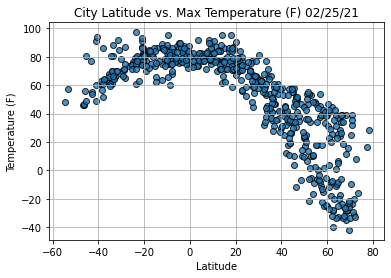

In [7]:
plt.scatter(lats, max_temps, edgecolor="k", linewidth=1, marker="o", alpha=0.8, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title("City Latitude vs. Max Temperature (F) " + time.strftime("%x"))
plt.grid(True)

plt.savefig("weather_data/Fig1.png")
plt.show()

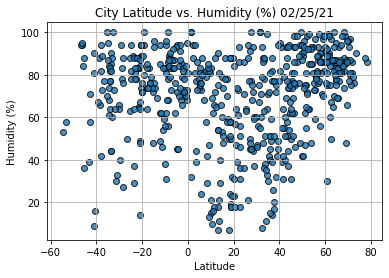

In [8]:
plt.scatter(lats, humidity, edgecolor="k", linewidth=1, marker="o", alpha=0.8, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (%) " + time.strftime("%x"))
plt.grid(True)

plt.savefig("weather_data/Fig2.png")
plt.show()

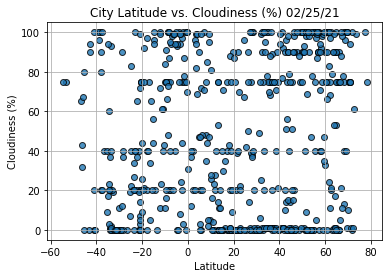

In [9]:
plt.scatter(lats, cloudiness, edgecolor="k", linewidth=1, marker="o", alpha=0.8, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.grid(True)

plt.savefig("weather_data/Fig3.png")
plt.show()

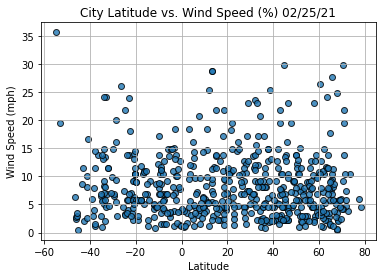

In [10]:
plt.scatter(lats, wind_speed, edgecolor="k", linewidth=1, marker="o", alpha=0.8, label="Cities")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (%) " + time.strftime("%x"))
plt.grid(True)

plt.savefig("weather_data/Fig4.png")
plt.show()

In [11]:
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + (" *  x  + ") + str(round(intercept, 2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

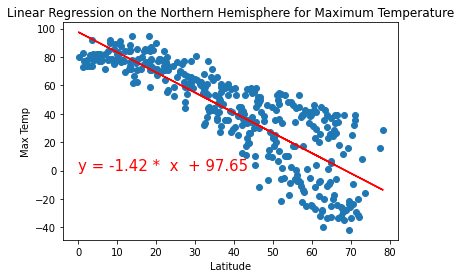

In [12]:
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere for Maximum Temperature", "Max Temp", (0,0))

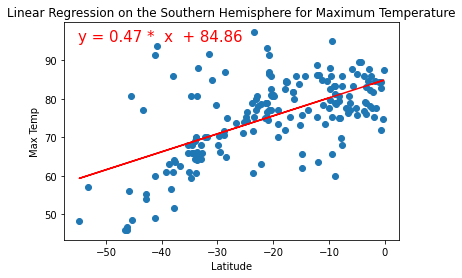

In [13]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere for Maximum Temperature", "Max Temp", (-55,95))

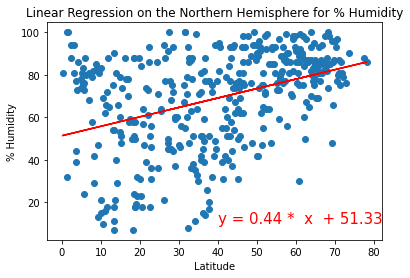

In [14]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere for % Humidity", "% Humidity",(40,10))

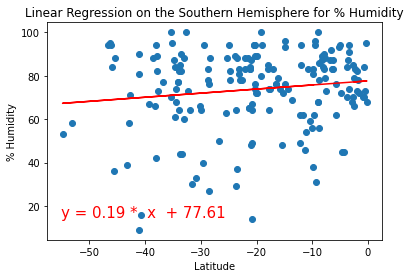

In [15]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere for % Humidity", "% Humidity", (-55, 15))

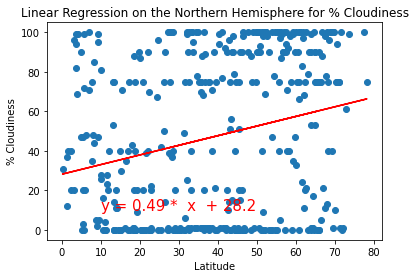

In [16]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere for % Cloudiness", "% Cloudiness",(10,10))

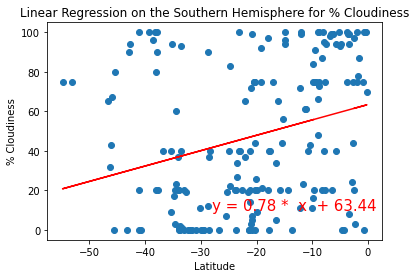

In [17]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere for % Cloudiness", "% Cloudiness", (-28, 10))

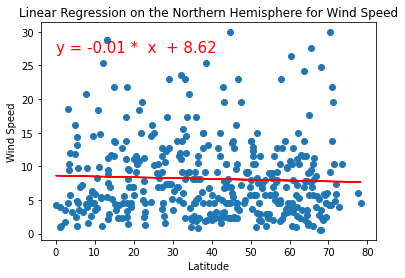

In [18]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "Linear Regression on the Northern Hemisphere for Wind Speed", "Wind Speed",(0,27))

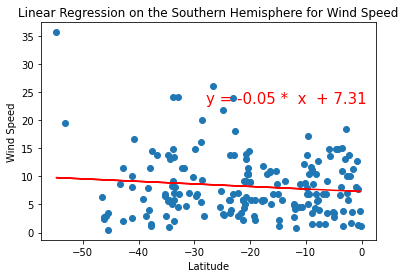

In [19]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_values, y_values, "Linear Regression on the Southern Hemisphere for Wind Speed", "Wind Speed", (-28, 23))

In [27]:
city_data_df.dtypes
gmaps.configure(api_key=g_key)

In [35]:
locations = city_data_df[["Lat", "Lng"]]
max_temp = city_data_df["Max Temp"]
fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=[max(temp, 0) for temp in max_temp])
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))